In [2]:
import pandas as pd
factories = pd.read_csv('../../data/chap_6/tbl_factory.csv')
factories

,FCID,FCName,FCDemand,FCRegion
0,FC00001,東京工場,28,関東
1,FC00002,木更津工場,29,関東
2,FC00003,多摩工場,31,関東
3,FC00004,横須賀工場,25,関東
4,FC00005,仙台工場,21,東北
5,FC00006,山形工場,30,東北
6,FC00007,那須工場,25,東北
7,FC00008,青森工場,16,東北


In [3]:
warehouses = pd.read_csv('../../data/chap_6/tbl_warehouse.csv')
warehouses

,WHID,WHName,WHSupply,WHRegion
0,WH00001,杉並倉庫,35,関東
1,WH00002,品川倉庫,41,関東
2,WH00003,豊洲倉庫,42,関東
3,WH00004,郡山倉庫,60,東北
4,WH00005,仙台倉庫,72,東北
5,WH00006,山形倉庫,65,東北


In [4]:
cost = pd.read_csv('../../data/chap_6/rel_cost.csv', index_col=0)
cost

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8
6,FC00002,WH00003,1.6
7,FC00003,WH00001,1.2
8,FC00003,WH00002,1.3
9,FC00003,WH00003,1.5


In [5]:
trans = pd.read_csv('../../data/chap_6/tbl_transaction.csv', index_col=0)
trans

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30
...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29
3996,2019-12-31 17:10:21,FC00002,WH00003,35
3997,2019-12-31 19:35:07,FC00003,WH00001,36


In [6]:
join_data = pd.merge(trans, cost, left_on=['ToFC', 'FromWH'], right_on=['FCID', 'WHID'], how='left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [8]:
join_data = pd.merge(join_data, factories, on='FCID', how='left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東


In [9]:
join_data = pd.merge(join_data, warehouses, on='WHID', how='left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北,山形倉庫,65,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北,郡山倉庫,60,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東,品川倉庫,41,関東


In [11]:
# カラム整形
join_data = join_data[['TransactionDate', 'Quantity', 'Cost', 'ToFC', 'FCName', 
                       'FCDemand', 'FromWH', 'WHName', 'WHSupply', 'WHRegion']]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東


In [12]:
join_data.isnull().sum()

TransactionDate    0
Quantity           0
Cost               0
ToFC               0
FCName             0
FCDemand           0
FromWH             0
WHName             0
WHSupply           0
WHRegion           0
dtype: int64

In [13]:
kanto = join_data.loc[join_data['WHRegion']=='関東']
tohoku = join_data.loc[join_data['WHRegion']=='東北']

In [15]:
print('関東支社の総コスト:' + str(kanto['Cost'].sum()) + '万円')
print('東北支社の総コスト:' + str(tohoku['Cost'].sum()) + '万円')
print('関東支社の総部品輸送個数:' + str(kanto['Quantity'].sum()) + '個')
print('東北支社の総部品輸送個数:' + str(tohoku['Quantity'].sum()) + '個')

関東支社の総コスト:2189.3万円
東北支社の総コスト:2062.0万円
関東支社の総部品輸送個数:49146個
東北支社の総部品輸送個数:50214個


In [18]:
tmp = kanto['Cost'].sum()*10000/kanto['Quantity'].sum()
print('関東支社の部品一個あたりの輸送コスト:' + str(int(tmp)) + '円/個')
tmp  = tohoku['Cost'].sum()*10000/tohoku['Quantity'].sum()
print('東北支社の部品一個あたりの輸送コスト:' + str(int(tmp)) + '円/個')

関東支社の部品一個あたりの輸送コスト:445円/個
東北支社の部品一個あたりの輸送コスト:410円/個


In [23]:
cost_chk = pd.merge(cost, factories, on='FCID', how='left')
print('関東支社の平均輸送コスト:' + str(cost_chk['Cost'].loc[cost_chk['FCRegion']=='関東'].mean()) + '万円')
print('東北支社の平均輸送コスト:' + str(cost_chk['Cost'].loc[cost_chk['FCRegion']=='東北'].mean()) + '万円')

関東支社の平均輸送コスト:1.075万円
東北支社の平均輸送コスト:1.05万円


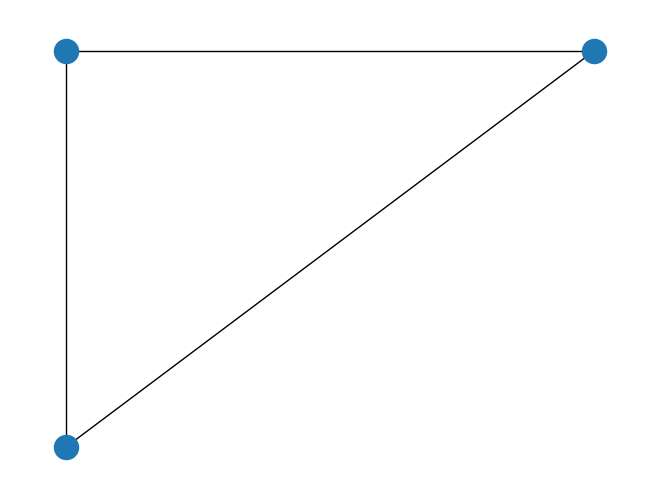

In [27]:
# ネットワークの可視化 - NetworkX -
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node('nodeA')
G.add_node('nodeB')
G.add_node('nodeC')

G.add_edge('nodeA', 'nodeB')
G.add_edge('nodeA', 'nodeC')
G.add_edge('nodeB', 'nodeC')

pos = {}
pos['nodeA'] = (0, 0)
pos['nodeB'] = (1, 1)
pos['nodeC'] = (0, 1)

nx.draw(G, pos)

plt.show()